<div align="center">
    <img src="images/logo_fmkn.png" alt="logo_fmkn" />
</div>

# Машинное обучение

### Лекция 8. Линейные методы классификации и регрессии: метод опорных векторов

<br />
<br />
29 октября 2021

### Задача обучения линейного классификатора (напоминание)

**Дано**:
Обучающая выборка $X^\ell = (x_i, y_i)_{i=1}^\ell$

$x_i$ — объекты, векторы из множества $X = \mathbb{R}^n$

$x_i$ — метки классов, элементы множества $Y = \{-1, +1\}$

**Найти**:
Параметры $w \in \mathbb{R}^n, w_0 \in \mathbb{R}$ линейной модели классификации

$a(x; w, w_0) = \text{sign}(\color{red}{\left< x, w\right> - w_0})$

**Критерий** — минимизация эмпирического риска:

$\sum\limits_{i=1}^\ell [a(x_i;w,w_0) \neq y_i] = \sum\limits_{i=1}^\ell [M_i(w, w_0) < 0] \to \min\limits_{w, w_0}$

где $M_i(w, w_0) = (\color{red}{\left< x, w\right> - w_0})y_i$ — отступ (margin) объекта $x_i$


### Аппроксимация и регуляризация эмпирического риска

Эмпирический риск — это кусочно-постоянная функция. Заменим его оценкой сверху, непрерывной по параметрам:

$Q(w, w_0) = \sum\limits_{i=1}^\ell \color{blue}{[M_i(w, w_0) < 0]} \leq 
\sum\limits_{i=1}^\ell \color{red}{(1 - M_i(w, w_0))_+} + \frac{1}{2C}\|w\|^2 \to \min\limits_{w, w_0}$

 * _Аппроксимация_ штрафует объекты за приближение к границе классов, увеличивая зазор между классами
 
 * _Регуляризация_ штрафует неустойчивые решения в случае мультиколлинеарности


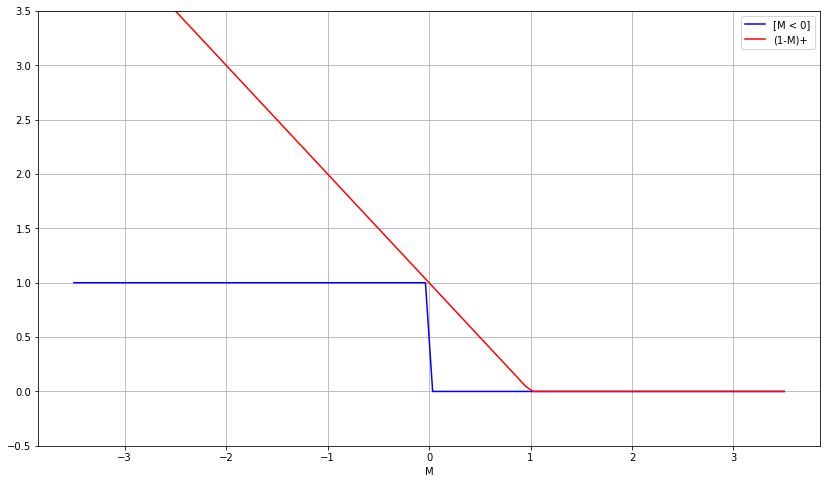

In [1]:
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots()

ax.set_xlabel('M')

x = np.linspace(-3.5, 3.5, num=100)
acc_loss = x < 0
V_M = (1 - x) * ((1 - x) > 0)

ax.plot(x, acc_loss, 'b', label='[M < 0]')
ax.plot(x, V_M, 'r', label='(1-M)+')

ax.set_ylim(-0.5, 3.5)
ax.grid(True)

fig.set_size_inches(14, 8)
plt.legend(loc='best')
plt.show()

### Оптимальная разделяющая гиперплоскость

Линейный классификатор: $a(x, w) = \text{sign}(\left<w, x\right> - w_0)$

Пусть выборка $X^\ell = (x_i, y_i)^\ell_{i=1}$ линейно разделима:

$\exists w, w_0: M_i(w, w_0) = y_i (\left<w, x_i \right> - w_0), i = 1, \dots, \ell$

Нормировка: $\min\limits_{i = 1, \dots, \ell} M_i (w, w_0) = 1$

Разделяющая полоса (разделяющая гиперплоскость посередине):

$\{x : -1 \leq \left<w, x \right> - w_0 \leq 1 \}$

$\exists x_+: \left<w, x_+ \right> - w_0 = +1$

$\exists x_-: \left<w, x_- \right> - w_0 = -1$

Ширина полосы:

$\frac{\left<w, x_+ - x_- \right>}{\|w\|} = \frac{2}{\|w\|} \to \max$

<div align="center">
    <img src="images/SVM_line.jpg" alt="SVM_line" width=400/>
</div>


### Обоснование кусочно-линейной функции потерь

Линейно разделимая выборка

$
\begin{cases}
\frac{1}{2} \|w\|^2 \to \min\limits_{w, w_0} \\
M_i(w, w_0) \geq 1, i = 1, \dots, \ell
\end{cases}
$

Переход к линейно неразделимой выборке (**эвристика**)

$
\begin{cases}
\frac{1}{2} \|w\|^2 + \color{red}{C\sum\limits_{i=1}^\ell \xi_i}  \to \min\limits_{w, w_0, \color{red}{\xi}} \\
M_i(w, w_0) \geq 1 - \color{red}{\xi_i}, i = 1, \dots, \ell \\
\color{red}{\xi_i \geq 0, i = 1, \dots, \ell}
\end{cases}
$

Эквивалентная задача безусловной минимизации:

$C \sum\limits_{i=1}^\ell (1 - M_i(w, w_0))_+ + \frac{1}{2} \|w\|^2 \to \min\limits_{w, w_0}$


### Влияние константы $C$ на решение SVM

SVM — аппроксимация и регуляризация эмпирического риска:

$ \sum\limits_{i=1}^\ell (1 - M_i(w, w_0))_+ + \frac{1}{2C} \|w\|^2 \to \min\limits_{w, w_0}$

<div align="center">
  <table>
    <tr>
      <td>большое C, слабая регуляризация</td>
      <td>малое C, сильная регуляризация</td>
    </tr>
    <tr>
      <td><img src="images/bigC.jpg" alt="bigC" width=400/></td>
      <td><img src="images/smallC.jpg" alt="smallC" width=400 /></td>
    </tr>
  </table>
</div>

----

Пример из Python SkLearn

### Условия Каруша-Куна-Таккера (ККТ)

Задача математического программирования:

$
\begin{cases}
f(x) \to \min\limits_{x} \\
g_i(x) \leq 0, i = 1, \dots, m \\
h_j (x) = 0, j= 1, \dots, k
\end{cases}
$

Необходимые условия. Если $x$ — точка локального минимума, то существуют множители 
$\mu_i, i = 1, \dots, m, \lambda_j, j = 1, \dots, k$:

$
\begin{cases}
\frac{\partial \mathcal{L}}{\partial x} = 0,\ \mathcal{L}(x; \mu, \lambda) = f(x) + \sum\limits_{i=1}^m \mu_i g_i(x) +
 \sum\limits_{j=1}^k \lambda_j h_j(x) \\
g_i(x) \leq 0, h_j(x) = 0\ (\text{исходные ограничения}) \\
\mu_i \geq 0\ (\text{двойственные ограничения}) \\
\mu_i g_i(x) = 0\ (\text{условие дополняющей нежесткости})
\end{cases}
$


### Применение условий ККТ к задаче SVM

Функция Лагранжа: 

$\mathcal{L} (w, w_0, \xi; \lambda, \eta) = \frac{1}{2} \|w\|^2 - \sum\limits_{i=1}^\ell \lambda_i (M_i(w,w_0)-1) - \sum\limits_{i=1}^\ell \xi_i(\lambda_i + \eta_i - C)$ 

$\lambda_i$ − переменные, двойственные к ограничениям $M_i \geq 1 - \xi_i$

$\eta_i$ — переменные, двойственные к ограничениям $\xi_i \geq 0$

$\begin{cases}
\frac{\partial \mathcal{L}}{\partial w} = 0,\ \frac{\partial \mathcal{L}}{\partial w_0} = 0,\ \frac{\partial \mathcal{L}}{\partial \xi} = 0 \\ 
\xi_i \geq 0, \lambda_i \geq 0, \eta_i \geq 0,\ i=1,\dots,\ell \\
\lambda_i = 0 \text{ либо } M_i(w, w_0) = 1 - \xi_i,\ i=1,\dots,\ell \\
\eta_i = 0 \text{ либо } \xi_i = 0,\ i=1,\dots, \ell
\end{cases}
$


### Необходимые условия седловой точки функции Лагранжа

Функция Лагранжа:

$\mathcal{L} (w, w_0, \xi; \lambda, \eta) = \frac{1}{2} \|w\|^2 - \sum\limits_{i=1}^\ell \lambda_i (M_i(w,w_0)-1) - \sum\limits_{i=1}^\ell \xi_i(\lambda_i + \eta_i - C)$ 

Необходимые условия седловой точки функции Лагранжа

$\frac{\partial \mathcal{L}}{\partial w} = w - \sum\limits_{i=1}^\ell \lambda_iy_ix_i = 0 \Rightarrow w = \sum\limits_{i=1}^\ell \lambda_iy_ix_i$

$\frac{\partial \mathcal{L}}{\partial w_0} = - \sum\limits_{i=1}^\ell \lambda_iy_i = 0 \Rightarrow \sum\limits_{i=1}^\ell \lambda_iy_i = 0$

$\frac{\partial \mathcal{L}}{\partial \xi_i} = - \lambda_i - \eta_i + C = 0 \Rightarrow \lambda_i + \eta_i = C,\ i=1,\dots,\ell$

<div class="alert alert-info">
<b>Вопрос 1:</b> Кто помнит доказательство?
</div>

### Понятие опорного вектора

Типизация объектов:

1. $\lambda_i = 0, \eta_i = C, \xi_i = 0, M_i \geq 1$

— периферийные (неинформативные) объекты

2. $0 < \lambda_i < C, 0 < \eta_i < C, \xi_i = 0, M_i = 1$

— <span style="color:red">опорные</span> граничные объекты

3. $\lambda_i = C, \eta_i = 0, \xi_i > 0, M_i < 1$

— <span style="color:red">опорные</span>-нарушители

**Определение**

Объект $x_i$ называется опорным, если $\lambda_i \neq 0$


### Двойственная задача

$\begin{cases}
-\mathcal{L}(\lambda) = - \sum\limits_{i=1}^\ell\lambda_i + \frac{1}{2} \sum\limits_{i=1}^\ell \sum\limits_{j=1}^\ell \lambda_i \lambda_j y_i y_j \color{red}{\left<x_i, x_j \right>} \to \min\limits_\lambda \\
0 \leq \lambda_i \leq C, i=1, \dots, \ell \\
\sum\limits_{i=1}^\ell \lambda_i y_i = 0
\end{cases}
$

Решение прямой задачи выражается через решение двойственной:

$\begin{cases}
w = \sum\limits_{i=1}^\ell \lambda_i y_i x_i \\
w_0 = \left<w, x_i \right> - y_i \text{ для любого } i: \lambda_i > 0, M_i = 1
\end{cases}$

Линейный классификатор с признаками $f_i(x) = \color{red}{\left< x_i, x \right>}$

$a(x) = \text{sign} \left(\sum\limits_{i=1}^\ell \lambda_i y_i \color{red}{\left<x_i, x\right>} - w_0 \right)$


### Нелинейное обобщение SVM

**Идея**: заменить скалярное произведение $\left<x, x^\prime\right>$ нелинейной функцией $K(x, x^\prime)$.
Переход к спрямляющему пространству, как правило, более высокой размерности: $\psi: X \to H$

**Определение**

Функция $K: X \times X \to \mathbb{R}$ — ядро, если $K(x, x^\prime) = \left<\psi(x), \psi(x^\prime) \right>$
при некотором $\psi: X \to H$, где $Н$ — гильбертово пространство.

**Теорема**

Функция $K(x, x^\prime)$ является ядром тогда и только тогда, когда она симметрична ($K(x, x^\prime) = K(x^\prime, x)$) и неотрицательно определена:

$\int_X\int_X K(x, x^\prime) g(x) g(x^\prime) dx dx^\prime \geq 0$ для любой $g: X \to \mathbb{R}$


### Конструктивные методы синтеза ядер

1. $K(x, x^\prime) = \left<x, x^\prime\right>$ — ядро
2. константа $K(x, x^\prime) = 1$ — ядро
3. произведение ядер $K(x, x^\prime) = K_1(x, x^\prime)K_2(x, x^\prime)$ — ядро
4. $\forall \psi: X \to \mathbb{R}$ произведение $K(x, x^\prime) = \psi(x) \psi(x^\prime)$ — ядро
5. Линейная комбинация $K(x, x^\prime) = \alpha_1 K_1(x, x^\prime) + \alpha_2 K_2(x, x^\prime)$ при $\alpha_i > 0$ — ядро
6. $\forall \phi: X \to X$ если $K_0$ ядро, то $K(x, x^\prime) = K_0(\phi(x), \phi(x^\prime))$ — ядро
7. если $s: X \times X \to \mathbb{R}$ — симметричная интегрируемая функция, то $K(x, x^\prime) = \int_X s(x, z) s(x^\prime, z) dz$ — ядро
8. если $K_0$ — ядро и функция $f: \mathbb{R} \to \mathbb{R}$ представима в виде сходящегося степенного ряда с неотрицательными коэффициентами, то $K(x, x^\prime) = f(K_0(x, x^\prime))$ — ядро


### Пример

<div align="center">
    <img src="images/svm_kernel_trick.png" alt="svm_kernel_trick" />
</div>


<div class="alert alert-info">
<b>Вопрос 2:</b> Какое ядро подойдёт для такого?
</div>

### Примеры ядер

 * $K(x, x^\prime) = \left<x, x^\prime\right>^2$ — квадратичное ядро
 * $K(x, x^\prime) = \left<x, x^\prime\right>^d$ — полиномиальное ядро с мономами степени $d$
 * $K(x, x^\prime) = (\left<x, x^\prime\right> + 1)^d$ — полиномиальное ядро с мономами степени $\leq d$
 * $K(x, x^\prime) = \tanh(k_1\left<x, x^\prime\right> - k_0), k_0, k_1 \geq 0$ — нейросеть с сигмоидными функциями активации
 * $K(x, x^\prime) = \exp(-\gamma \|x - x^\prime \|^2)$ — сеть радиальных базисных функций (RBF ядро)

### Классификация с различными ядрами

Гиперплоскость в спрямляющем пространстве соответствует нелинейной разделяющей поверхности в исходном.

Примеры с различными ядрами $K(x, x^\prime)$

<div align="center">
  <table>
    <tr>
      <td>линейное, $\left<x, x^\prime\right>$</td>
      <td>полиномиальное, $(\left<x, x^\prime\right> + 1)^d, d=3$</td>
      <td>гауссовское, $\exp(-\gamma \|x - x^\prime \|^2)$</td>
    </tr>
    <tr>
      <td><img src="images/linK.jpg" alt="linK" width=400/></td>
      <td><img src="images/polyK.jpg" alt="poly" width=400 /></td>
      <td><img src="images/gaussK.jpg" alt="gaussK" width=400 /></td>
    </tr>
  </table>
</div>

----

Пример из Python SkLearn


### SVM как двухслойная нейронная сеть

Перенумеруем объекты так, чтобы $x_1, \dots, x_h$ были опорными.

$a(x) = \text{sign} \left(\sum\limits_{i=1}^h \lambda_i y_i K(x, x_i) - w_0\right)$

<div align="center">
    <img src="images/SVM_as_NN.jpg" alt="SVM_as_NN" width=600 />
</div>

Первый слой вместо скалярных произведений вычисляет ядра.


### Преимущества и недостатки SVM

**Преимущества** SVM перед двухслойными нейронными сетями:
 * Задача выпуклого квадратичного программирования имеет единственное решение
 * Число нейронов скрытого слоя определяется автоматически — это число опорных векторов
 
**Недостатки** классического SVM:
 * Нет общих подходов к оптимизации $K(x, x^\prime)$ под задачу
 * На больших данных SVM может обучаться медленно
 * Нет «встроенного» отбора признаков
 * Приходится подбирать константу $С$


### SVM-регрессия

**Модель регрессии**: $a(x) = \left<x, w\right> - w_0, w \in \mathbb{R}^n, w_0 \in \mathbb{R}$

**Функция потерь**: $\color{red}{\mathcal{L} (|\varepsilon|-\delta)_+}$ в сравнении с $\color{blue}{\mathcal{L}(\varepsilon) = \varepsilon^2}$:


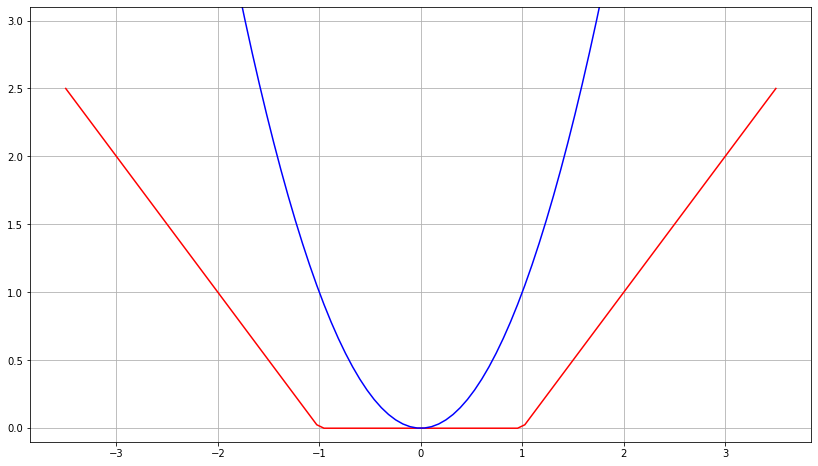

In [2]:
fig, ax = plt.subplots()

x = np.linspace(-3.5, 3.5, num=100)
L_1 = (abs(x) - 1) * (abs(x) - 1 > 0)
L_2 = x**2

ax.plot(x, L_1, 'r')
ax.plot(x, L_2, 'b')

ax.set_ylim(-0.1, 3.1)
ax.grid(True)

fig.set_size_inches(14, 8)
plt.show()

**Постановка задачи**:

$\sum\limits_{i=1}^\ell (|\left< w, x_i\right> - w_0 - y_i| - \delta)_+ + \frac{1}{2C}\|w\|^2 \to \min\limits_{w,w_0}$

Задача решается путём замены переменных и сведения к задаче квадратичного программирования


### SVM-регрессия

Замена переменных:

$\varepsilon_i^+ = (\left< w, x_i\right> - w_0 - y_i - \delta)_+$

$\varepsilon_i^- = (-\left< w, x_i\right> + w_0 + y_i - \delta)_+$

Постановка задачи SVM-регрессии:

$
\begin{cases}
\frac12 \|w\|^2 + C \sum\limits_{i=1}^\ell (\varepsilon_i^+ + \varepsilon_i^-) \to \min\limits_{w, w_0,\varepsilon^+,\varepsilon^-} \\ 
y_i - \delta - \varepsilon_i^- \leq \left< w, x_i\right> - w_0 \leq y_i + \delta + \varepsilon_i^+, i=1,\dots,\ell \\
\varepsilon_i^- \geq 0, \varepsilon_i^+ \geq 0, i=1,\dots,\ell
\end{cases}
$

Это задача квадратичного программирования с линейными ограничениями-неравенствами, решается также сведением к двойственной задаче.


### 1-norm SVM (LASSO SVM)

LASSO — Least Absolute Shrinkage and Selection Operator. Аппроксимация эмпирического риска с $L_1$-регуляризацией:

$\sum\limits_{i=1}^\ell (1-M_i(w,w_0))_+ + \mu \sum\limits_{j=1}^n |w_j| \to \min\limits_{w,w_0} $

+ Отбор признаков с параметром _селективности_ $\mu$: чем больше $\mu$, тем меньше признаков останется

- LASSO начинает отбрасывать значимые признаки, когда ещё не все шумовые отброшены

- Нет _эффекта группировки_ (grouping effect): значимые зависимые признаки должны отбираться вместе и иметь примерно равные веса $w_j$

----

Bradley P., Mangasarian O. Feature selection via concave minimization and support vector machines // ICML 1998


<div class="alert alert-info">
<b>Вопрос 2:</b> Почему $L_1$-регуляризатор приводит к отбору признаков?
</div>

### 1-norm SVM (LASSO SVM)

Аппроксимация эмпирического риска с $L_1$-регуляризацией:

$\sum\limits_{i=1}^\ell (1-M_i(w,w_0))_+ + \mu \sum\limits_{j=1}^n |w_j| \to \min\limits_{w,w_0} $

Замена переменных: $u_j = \frac12 (|w_j|+w_j)$, $v_j = \frac12 (|w_j|-w_j)$

Тогда $w_j = u_j - v_j$ и $|w_j| = u_j + v_j$
    
$\begin{cases}
\sum\limits_{i=1}^\ell (1-M_i(u-v,w_0))_+ + \mu \sum\limits_{j=1}^n (u_j + v_j) \to \min\limits_{u,v} \\
u_j \geq 0, v_j \geq 0, j = 1, \dots, n 
\end{cases}
$

чем больше $\mu$, тем больше индексов $j$ таких, что $u_j = v_j = 0$, но тогда $w_j = 0$, то есть **признак не учитывается**.

### Сравнение $L_2$ и $L_1$ регуляризации

Зависимость весов $w_j$ от коэффициента $\frac{1}{\mu}$

<div align="center">
  <table>
    <tr>
      <td>$L_2$ регуляризатор, $\mu \sum_j w_j^2$</td>
      <td>$L_1$ регуляризатор, $\mu \sum_j |w_j|$</td>
    </tr>
    <tr>
      <td><img src="images/UCI_L2.jpg" alt="UCI_L2" width=400/></td>
      <td><img src="images/UCI_L1.jpg" alt="UCI_L1" width=400/></td>
    </tr>
  </table>
</div>

Задача из UCI: prostate cancer (диагностика рака)

----

_T.Hastie, R. Tibshirani, J.Friedman_. The Elements of Statistical Learning. 2001.


### Doubly Regularized SVM (Elastic Net SVM)

 $C\sum\limits_{i=1}^\ell (1-M_i(w,w_0))_+ + \mu \sum\limits_{j=1}^n |w_j| + \frac12\sum\limits_{j=1}^n w_j^2 \to \min\limits_{w,w_0}$

+ Отбор признаков с параметром селективности $\mu$: чем больше $\mu$, тем меньше признаков останется
+ Есть эффект группировки
- Шумовые признаки также группируются вместе, и группы значимых признаков могут отбрасываться, когда ещё не все шумовые отброшены

----

Li Wang, Ji Zhu, Hui Zou. The doubly regularized support vector machine. 2006


### Doubly Regularized SVM (Elastic Net SVM)

Elastic Net менее жёстко отбирает признаки.

Зависимости весов $w_j$ от коэффициента $\log \frac{1}{\mu} = -\log \alpha$

<div align="center">
    <img src="images/lasso_coordinate_descent_elastic_net.png" alt="lasso_coordinate_descent_elastic_net" width=500 />
</div>

----

Пример из Python SkLearn: scikitlearn.org/0.5/auto_examples/glm/plot_lasso_coordinate_descent_path.html

### Support Features Machine (SFM)

$C \sum\limits_{i=1}^\ell (1 - M_i(w, w_0))_+ + \sum\limits_{j=1}^n R_\mu(w_j) \to \min\limits_{w, w_0}$

$R_\mu(w_j) = 
\begin{cases}
2\mu |w_j|, |w_j| \leq \mu\\
\mu^2 + w^2_j, \geq \mu
\end{cases}
$

<div align="center">
    <img src="images/SFM.jpg" alt="SFM" />
</div>

+ Отбор признаков с параметром селективности $\mu$
+ Есть эффект группировки
+ Значимые зависимые признаки ($|w_j| > \mu$) группируются и входят в решение совместно (как в Elastic Net)
+ Шумовые признаки ($|w_j| < \mu$) подавляются независимо (как в LASSO)

----

_Tatarchuk A., Urlov E., Mottl V., Windridge D._ A support kernel machine for supervised selective combining of diverse pattern-recognition modalities. 2010.


### Relevance Features Machine (RFM)

$C \sum\limits_{i=1}^\ell (1 - M_i(w, w_0))_+ + \sum\limits_{j=1}^n \ln\left( w_j^2 + \frac{1}{\mu}\right) \to \min\limits_{w, w_0}$

$R(w) = \ln (w^2 + \frac{1}{\mu})$ при $\mu = \color{green}{0.1}, \color{blue}{1}, \color{red}{100}$

<div align="center">
    <img src="images/RFM.jpg" alt="RFM" />
</div>

+ Отбор признаков с параметром селективности $\mu$: чем больше $\mu$, тем меньше признаков останется
+ Есть эффект группировки
+ Лучше отбирает набор значимых признаков, когда они только совместно обеспечивают хорошее решение

----

Tatarchuk A., Mottl V., Eliseyev A., Windridge D. Selectivity supervision in combining pattern recognition modalities by feature- and kernel-selective Support Vector Machines. 2008.


### Резюме по линейным классификаторам

 * SVM — лучший метод линейной классификации
 * SVM изящно обобщается для нелинейной классификации, для линейной и нелинейной регрессии
 * _Аппроксимация пороговой функции потерь_ $\mathcal{L}(M)$ увеличивает зазор и повышает качество классификации
 * _Регуляризация_ устраняет мультиколлинеарность и уменьшает переобучение, по сути она эквивалентна введению априорного распределения в пространстве коэффициентов
 * Негладкость функции потерь приводит к отбору объектов
 * Негладкость регуляризатора приводит к отбору признаков